# Introduction

This is my first work of machine learning.

- Origin data called: `train_df_org`, `test_df_org`
- Processing data called: `train_df`, `test_df`, `full_df`
- Data after clean called: `train_df_clean`, `test_df_clean`
- Train data will be splitted 2 set called : `train_df_train`, `train_df_test` 
- Data value called: `train_df_val`, `test_df_val`


# Preparing dataset

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


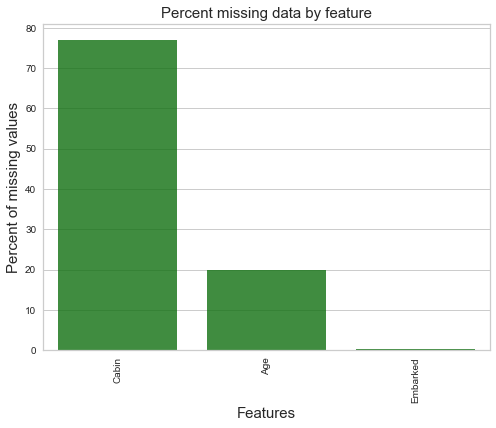

In [237]:
# Basic Libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

# Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
train_df_org = pd.read_csv('../input/train.csv', header = 0)
test_df_org = pd.read_csv('../input/test.csv' , header = 0)
# Tmp data
train_df = train_df_org.copy()
test_df  = test_df_org.copy()
full_df = [train_df, test_df]

# Function to calculate no. of null values with percentage in the dataframe
def null_values(data):    
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

null_values(train_df)

### Train dataset info

In [ ]:
print('Len: ', len(train_df))
train_df.head()

In [ ]:
train_df.describe()

### Test dataset info

In [ ]:
print('Len: ', len(test_df))
test_df.head()

In [ ]:
test_df.describe()

# Correlation

In [ ]:
## get the most important variables. 
corr = train_df.corr()**2
corr.Survived.sort_values(ascending=False)

In [ ]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot
plt.subplots(figsize = (15,12))
sns.heatmap(train_df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# Feature statistics

In [216]:
# Continuous Data Plot
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()
    # WARNING: This will leave Counts column in dataset if you continues to use this dataset

# Categorical/Ordinal Data Plot
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()

# Color map for visualization
survival_palette = {0: "black", 1: "orange"} 

In [ ]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'Pclass','Survived', survival_palette)

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train_df.Pclass[train_df.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train_df.Pclass.unique()), labels);

In [ ]:
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'Sex','Survived', survival_palette)

In [ ]:
age_set_nonan = train_df[['Age','Survived']].copy().dropna(axis=0)
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, [1, 0], range(0,100,10))

In [ ]:
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'SibSp','Survived', survival_palette)

In [ ]:
print(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'Parch','Survived', survival_palette)

In [ ]:
# Copy dataframe so method won't leave Counts column in train_df
fare_set = train_df[['Fare','Survived']].copy()
cont_plot(fare_set, 'Fare', 'Survived', survival_palette, [1, 0], range(0,550,50))

In [ ]:
# Fare zoom-in to check
fare_set_mod = train_df[['Fare','Survived']].copy()
fare_set_mod['Counts'] = "" 
fig, axis = plt.subplots(1,1,figsize=(10,5))
sns.violinplot(x='Fare', y="Counts", hue='Survived', hue_order=[1, 0], data=fare_set_mod,
               palette=survival_palette, split=True, orient='h', ax=axis)
axis.set_xticks(range(0,100,10))
axis.set_xlim(-20,100)
plt.show()

In [ ]:
emb_set_nonan = train_df[['Embarked','Survived']].copy().dropna(axis=0)
cat_plot(train_df, 'Embarked','Survived', survival_palette)

# Preprocess data

In [217]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Data cleaning

In [238]:
# SibSp and Parch
"""
With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.
"""
for dataset in full_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [239]:
"""
It seems has a good effect on our prediction but let's go further and categorize people to check whether they are alone in this ship or not.
"""
for dataset in full_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [240]:
# Embarked
"""
The embarked feature has some missing value. and we try to fill those with the most occurred value ( 'S' ).
"""
for dataset in full_df:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [241]:
# Cabin
"""
Separate cabin to 0 for NaN, otherwise to 1
"""
for dataset in full_df:
#     dataset['Cabin'][pd.notna(dataset['Cabin'])] = 1
#     dataset['Cabin'] = dataset['Cabin'].fillna(0)
#     or
    dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
print (train_df[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())

   Cabin  Survived
0      0  0.299854
1      1  0.666667


In [242]:
# Fare
"""
Fare also has some missing value and we will replace it with the median. then we categorize it into 4 ranges.
"""
for dataset in full_df:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [243]:
# Title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_df:
    dataset['Title'] = dataset['Name'].apply(get_title)

pd.crosstab(train_df['Title'], train_df['Sex'])

for dataset in full_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


    Title        Age
0  Master   4.574167
1    Miss  21.845638
2      Mr  32.368090
3     Mrs  35.788991
4    Rare  45.545455


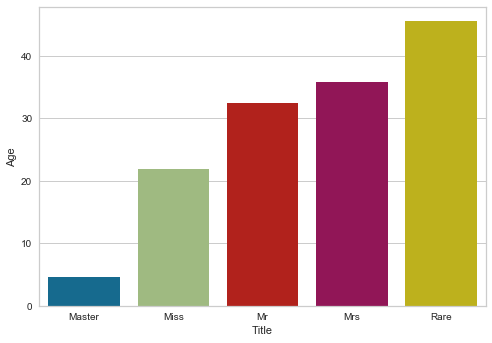

In [244]:
Mean_Age = train_df[['Title','Age']].groupby(['Title'],as_index = False).mean().sort_values(by='Age')
sns.barplot(x='Title', y='Age', data=Mean_Age)
print(Mean_Age)

In [245]:
# Age
# for dataset in full_df:
#     age_avg 	   = dataset['Age'].mean()
#     age_std 	   = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()
    
#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
#     dataset['Age'] = dataset['Age'].astype(int)

for dataset in full_df:
    dataset['Age'] = dataset['Age'].fillna(-1)
    
for dataset in full_df:
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Master'), 'Age'] = 4.57
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Miss'), 'Age'] = 21.84
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mr'), 'Age'] = 32.36
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mrs'), 'Age'] = 35.78
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Rare'), 'Age'] = 45.54
    dataset['Age'] = dataset['Age'].astype(int)   

train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

print (train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.548077
1   (16.0, 32.0]  0.328032
2   (32.0, 48.0]  0.436275
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [246]:
for dataset in full_df:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

    
# Normalized
# for dataset in full_df:
#     for col in ['Pclass', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title']:
#         dataset[col] = StandardScaler().fit_transform(dataset[col].astype(float).values.reshape(-1, 1))
        
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,Title,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,0,0,2,0,"(-0.001, 7.91]",1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,1,1,2,0,"(31.0, 512.329]",3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,0,0,1,1,"(7.91, 14.454]",2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,1,0,2,0,"(31.0, 512.329]",3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,0,0,1,1,"(7.91, 14.454]",1,"(32.0, 48.0]"


# Outlier detection

In [326]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import lightgbm as lgb

def get_feature_importances(data, shuffle=False, seed=None):
    data = data.copy()
    target_col_name = 'Survived'
    not_features = [target_col_name, 'PassengerId']
    # Gather real features
    valid_data_feature = data.select_dtypes(exclude=['object', 'category'])
    train_features = [f for f in valid_data_feature if f not in not_features]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = data[target_col_name].copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = data[target_col_name].copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 10,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 5
    }
    
    # Fit the model
    clf = lgb.train(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=500)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

# Get the actual importance
actual_imp_df2 = get_feature_importances(data=train_df).sort_values(by='importance_gain', ascending=False)
actual_imp_df2.head(20)

,feature,importance_gain,importance_split,trn_score
10,Title,9505.319639,569,0.887126
1,Sex,8131.013496,254,0.887126
0,Pclass,3337.534780,940,0.887126
8,FamilySize,1840.912420,948,0.887126
6,Cabin,1535.236321,381,0.887126
5,Fare,804.514865,1328,0.887126
2,Age,588.216780,996,0.887126
3,SibSp,503.438953,479,0.887126
7,Embarked,481.189789,833,0.887126
4,Parch,224.486857,386,0.887126


## Feature selection

In [ ]:
"Before", train_df.shape, test_df.shape, full_df[0].shape, full_df[1].shape

In [332]:
# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'IsAlone', 'Parch', 'SibSp', 'Embarked']
train_df_clean = train_df.drop(drop_elements, axis = 1)
train_df_clean = train_df_clean.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test_df_clean  = test_df.drop(drop_elements, axis = 1)

train_df_val = train_df_clean.values
test_df_val  = test_df_clean.values

# output
train_df_clean.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,FamilySize,Title
0,0,3,1,1,0,0,2,1
1,1,1,0,2,3,1,2,3
2,1,3,0,1,1,0,1,2
3,1,1,0,2,3,1,2,3
4,0,3,1,2,1,0,1,1


In [ ]:
"After", train_df_clean.shape, test_df_clean.shape, full_df[0].shape, full_df[1].shape

In [333]:
# Get the actual importance, i.e. without shuffling
actual_imp_df = get_feature_importances(data=train_df_clean, shuffle=False).sort_values(by='importance_gain', ascending=False)
actual_imp_df.head(20)

,feature,importance_gain,importance_split,trn_score
6,Title,9449.546434,717,0.882104
1,Sex,8023.577430,254,0.882104
0,Pclass,3404.881448,991,0.882104
5,FamilySize,1885.662817,1372,0.882104
4,Cabin,1423.315659,354,0.882104
3,Fare,905.220920,1467,0.882104
2,Age,632.142204,1251,0.882104


# Machine learning

Now we are ready to train a model and predict the required solution.

- KNN or k-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifier
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- Naive Bayes Classifier
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Logistic Regession
- Perceptron
- Stochastic Gradient Descent

                            Model     Score
6      GradientBoostingClassifier  0.837778
1                             SVC  0.831111
3          DecisionTreeClassifier  0.825556
5              AdaBoostClassifier  0.824444
4          RandomForestClassifier  0.818889
10             LogisticRegression  0.813333
9   QuadraticDiscriminantAnalysis  0.812222
2                       LinearSVC  0.805556
0            KNeighborsClassifier  0.800000
8      LinearDiscriminantAnalysis  0.800000
7                      GaussianNB  0.778889
12                  SGDClassifier  0.760000
11                     Perceptron  0.746667


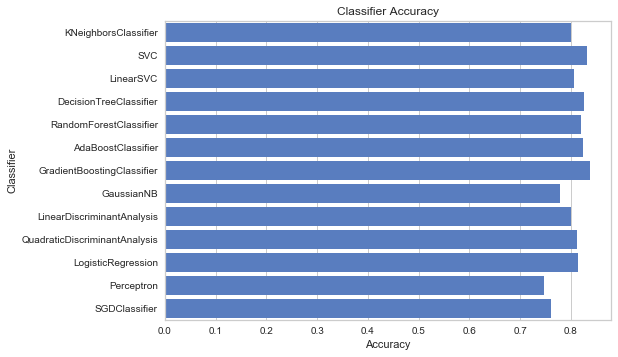

In [334]:
# Evaluation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
# Classifier (machine learning algorithm) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(max_iter=10000),
    LinearSVC(max_iter=10000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    Perceptron(max_iter=100),
    SGDClassifier(),
]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

# Config data for classifiers
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_df_val[0::, 1::]
Y = train_df_val[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(Y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

# Show plot
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

# Print score
models_score = pd.DataFrame({
    'Model': list(acc_dict.keys()),
    'Score': list(acc_dict.values())}).sort_values(by='Score', ascending=False)
print(models_score)


**Select candidate model**

In [ ]:
candidate_classifier = classifiers[models_score.head(1).index[0]]
print('Candidate classifier: ', candidate_classifier)

# Prediction

In [ ]:
candidate_classifier.fit(X, Y)
predict_res = candidate_classifier.predict(test_df_clean).astype(int)

print('Predic finish.', predict_res.shape)

# Export submission

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict_res
    })
print(submission.head())
submission.to_csv('../output/export_submission.csv', index=False)
